# Ejercicion de programación - Regresión Logistica

En este ejercicio se implementa regresion logistica y se aplica a dos diferentes datasets.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#LUIS ROLANDO CALCINA QUISPE             ING. EN CIENCIAS DE LA COMP.
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np
import pandas as pd

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

## 1 Regresion Logistica

En esta parte del ejercicio, creará un modelo de regresión logística para predecir si un estudiante será admitido en una universidad. Suponga que es el administrador de un departamento universitario y desea determinar las posibilidades de admisión de cada solicitante en función de sus resultados en dos exámenes. Tiene datos históricos de solicitantes anteriores que puede usar como un conjunto de capacitación para la regresión logística. Para cada ejemplo de capacitación, se tiene las calificaciones del solicitante en dos exámenes y la decisión de admisión. Su tarea es crear un modelo de clasificación que calcule la probabilidad de admisión de un solicitante en función de los puntajes de esos dos exámenes.

La siguiente celda cargará los datos y las etiquetas correspondientes:

In [6]:
# Cargar datos
# Las dos primeras columnas contienen la nota de dos examenes y la tercera columna
# contiene la etiqueta que indica si el alumno ingreso o no a la universidad.
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Tareas/dataset.csv', delimiter=',')
data["Cubre Deuda"] = (data["Ahorros"] >= data["Deuda Total"]).astype(int)
X = data.iloc[:, 0:5].values  # Tomamos las 5 primeras columnas como características
y = data["Cubre Deuda"].values  # Usamos la nueva clasificación
print(X)
print(y)

[[   76.          6113.          3862.79978528  2250.20021472
  12589.        ]
 [   33.          9419.          5132.54525114  4286.45474886
   8391.        ]
 [   35.          3881.          2168.37788232  1712.62211768
  19324.        ]
 ...
 [   27.          3311.          1012.45777504  2298.54222496
   2820.        ]
 [   68.          1789.           804.68563042   984.31436958
  15472.        ]
 [   74.          1171.           716.16120682   454.83879318
   4959.        ]]
[0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1

In [7]:
data.info()
print(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Edad             1000 non-null   int64  
 1   Ingreso Mensual  1000 non-null   int64  
 2   Gasto Mensual    1000 non-null   float64
 3   Ahorros          1000 non-null   float64
 4   Deuda Total      1000 non-null   int64  
 5   Cubre Deuda      1000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 47.0 KB
     Edad  Ingreso Mensual  Gasto Mensual      Ahorros  Deuda Total  \
0      76             6113    3862.799785  2250.200215        12589   
1      33             9419    5132.545251  4286.454749         8391   
2      35             3881    2168.377882  1712.622118        19324   
3      66             3865    1995.027955  1869.972045        19874   
4      35             3575    2845.162787   729.837213        13350   
..    ...              ...            ...         

### 1.1 Visualizar los datos

Antes de comenzar a implementar cualquier algoritmo de aprendizaje, siempre es bueno visualizar los datos si es posible. Mostramos los datos en una gráfica bidimensional llamando a la función `plotData`. Se completará el código en `plotData` para que muestre una figura donde los ejes son los dos puntajes de los dos examenes, los ejemplos positivos y negativos se muestran con diferentes marcadores.

In [8]:
def plotData(X, y):
    # Gragica los puntos de datos X y y en una nueva figura. Grafica los puntos de datos con * para los positivos y
    # o para los negativos.

    # Crea una nueva figura
    fig = pyplot.figure()

    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0

    # Plot Examples
    pyplot.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
    pyplot.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)


Se llama a la función implementada para mostrar los datos cargados:

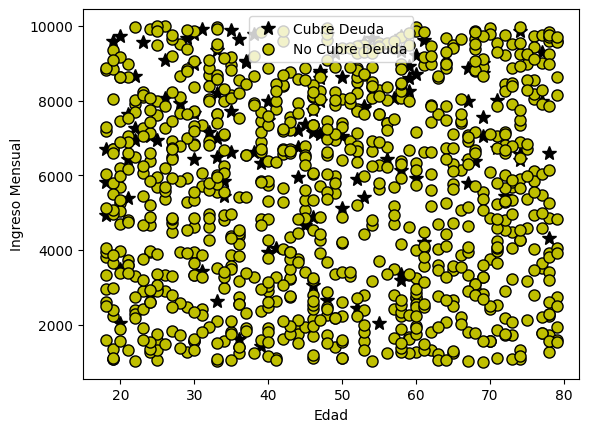

In [9]:
plotData(X, y)
# adiciona etiquetas para los ejes
pyplot.xlabel('Edad')  # Puedes cambiar por otra variable relevante
pyplot.ylabel('Ingreso Mensual')
pyplot.legend(['Cubre Deuda', 'No Cubre Deuda'])
pass

**NORMALIZACION**

In [10]:
def featureNormalize(X):
    """
    Normaliza las características usando media y desviación estándar
    """
    X_norm = X.copy()
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)

    # Evitar división por cero
    sigma[sigma == 0] = 1

    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma


In [11]:
# Normalizar características
X_norm, mu, sigma = featureNormalize(X)
print("Datos normalizados (primeras 5 filas):")
print(X_norm[:5])
print("Media:", mu)
print("Desviación estándar:", sigma)

Datos normalizados (primeras 5 filas):
[[ 1.54143194  0.18990026  0.45158754 -0.18241985  0.40733871]
 [-0.83484789  1.43129934  1.18896582  1.18375183 -0.32452951]
 [-0.72432325 -0.64821309 -0.53241276 -0.5430938   1.5815008 ]
 [ 0.98880872 -0.65422107 -0.63308212 -0.43752398  1.67738634]
 [-0.72432325 -0.76311572 -0.13938399 -1.2024676   0.54000944]]
Media: [   48.107       5607.272       3085.17825493  2522.09374507
 10252.503     ]
Desviación estándar: [  18.0955119  2663.12425997 1721.9729655  1490.48217682 5736.00533176]


In [12]:
m, n = X_norm.shape
X_norm_with_intercept = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

<a id="section1"></a>
### 1.2 Implementacion

#### 1.2.1 Fución Sigmoidea

La hipotesis para la regresión logistica se define como:

$$ h_\theta(x) = g(\theta^T x)$$

donde la función $g$ is la función sigmoidea. La función sigmoidea se define como:

$$g(z) = \frac{1}{1+e^{-z}}$$.

Los resultados que debe generar la funcion sigmoidea para valores positivos amplios de `x`, deben ser cercanos a 1, mientras que para valores negativos grandes, la sigmoide debe generar valores cercanos 0. La evaluacion de `sigmoid(0)` debe dar un resultado exacto de 0.5. Esta funcion tambien debe poder trabajar con vectores y matrices.

In [13]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)
    z = np.clip(z, -500, 500)
    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

Se calcula el valor de la sigmoide aplicando la funcion sigmoid con `z=0`, se debe obtener un resultado de 0.5. RE recomienda experimentar con otros valores de `z`.

In [14]:
# Prueba la implementacion de la funcion sigmoid
z = [0, 0.5, 1]
g = sigmoid(z)

print('g(', z, ') = ', g)

g( [0, 0.5, 1] ) =  [0.5        0.62245933 0.73105858]


<a id="section2"></a>
#### 1.2.2 Función de Costo y Gradiente

Se implementa la funcion cost y gradient, para la regresión logistica. Antes de continuar es importante agregar el termino de intercepcion a X.

La funcion de costo en una regresión logistica es:

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left[ -y^{(i)} \log\left(h_\theta\left( x^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - h_\theta\left( x^{(i)} \right) \right) \right]$$

y el gradiente del costo es un vector de la misma longitud como $\theta$ donde el elemento $j^{th}$ (para $j = 0, 1, \cdots , n$) se define como:

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} $$

Si bien este gradiente parece idéntico al gradiente de regresión lineal, la fórmula es diferente porque la regresión lineal y logística tienen diferentes definiciones de $h_\theta(x)$.
<a id="costFunction"></a>

In [15]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta))
    epsilon = 1e-15
    h = np.clip(h, epsilon, 1-epsilon)
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [16]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

J_history (primeros 10 valores):
[0.6912850212427334, 0.6894326775837569, 0.6875900940285024, 0.6857572152085923, 0.6839339859447423, 0.6821203512496271, 0.6803162563306564, 0.6785216465926609, 0.6767364676404884, 0.6749606652815141, 0.6731941855280634, 0.6714369745997508, 0.6696889789257366, 0.6679501451468973, 0.6662204201179197, 0.6644997509093107, 0.662788084809332, 0.661085369325856, 0.6593915521881443, 0.6577065813485541, 0.6560304049841692, 0.6543629714983602, 0.6527042295222704, 0.6510541279162364, 0.6494126157711366, 0.6477796424096743, 0.6461551573875929, 0.6445391104948283, 0.6429314517565972, 0.6413321314344202, 0.6397411000270891, 0.6381583082715679, 0.6365837071438402, 0.6350172478596956, 0.6334588818754612, 0.6319085608886769, 0.6303662368387178, 0.6288318619073613, 0.627305388519305, 0.6257867693426324, 0.6242759572892274, 0.6227729055151437, 0.6212775674209242, 0.6197898966518731, 0.6183098470982865, 0.6168373728956345, 0.6153724284247022, 0.6139149683116885, 0.6124649

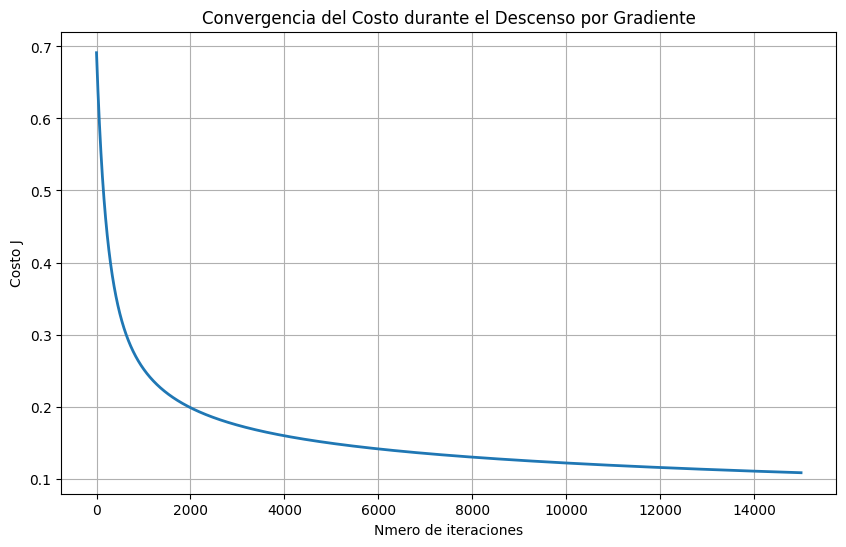

In [17]:
# Configurar parámetros para el descenso por gradiente
alpha = 0.01  # Tasa de aprendizaje
num_iters = 15000  # Número de iteraciones

# Inicializar theta y ejecutar el descenso por gradiente
initial_theta = np.zeros(X_norm_with_intercept.shape[1])
theta, J_history = descensoGradiente(initial_theta, X_norm_with_intercept, y, alpha, num_iters)

print("J_history (primeros 10 valores):")
print(J_history[:])

# Graficar la convergencia del costo
pyplot.figure(figsize=(10, 6))
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Nmero de iteraciones')
pyplot.ylabel('Costo J')
pyplot.title('Convergencia del Costo durante el Descenso por Gradiente')
pyplot.grid(True)
pyplot.show()

In [32]:
# Datos de prueba: Edad, Ingreso Mensual, Ahorros, Gastos Mensuales, Deuda Total
X_array = [1, 35, 20000, 5000, 1000, 2000]  # Asegurarse de que coincida con la estructura de X

# Predicción usando el modelo entrenado
y_predicted = sigmoid(np.dot(X_array, theta))

print('Una persona con Edad: 35 años, Ingreso Mensual: 3000, Ahorros: 20000, Gastos: 1000, Deuda Total: 2000')
print('Probabilidad de que cubra su deuda: {:.2f}'.format(y_predicted))

X_array = [1, 45, 1500, 1000, 2000, 5000]  # Edad: 30, Ingreso: 8000, Ahorros: 20000, Gastos: 1000, Deuda: 2000
y_predicted = sigmoid(np.dot(X_array, theta))

print('Probabilidad de que cubra su deuda: {:.2f}'.format(y_predicted))


Una persona con Edad: 35 años, Ingreso Mensual: 3000, Ahorros: 20000, Gastos: 1000, Deuda Total: 2000
Probabilidad de que cubra su deuda: 1.00
Probabilidad de que cubra su deuda: 0.00
